# Beam Shaping Singlet: Gaussian to flat-top

the goal is to demonstrate how to simulate the irradiance profile for an input collimated extended gaussian sourc, using the new extended source feature.

In [1]:
import optiland.backend as be
from optiland.optic import Optic
from optiland.sources import CollimatedGaussianSource, GaussianSource
from optiland.analysis import IncoherentIrradiance
from optiland.physical_apertures import RectangularAperture

In [2]:
gaussian_beam_waist = 5.0  # in mm
wavelength_µm = 0.55  # in µm
forbes_terms = {
    0: 0.5414,
    1: 0.6689,
    2: 0.3409,
    3: -0.0537,
    4: -0.3960,
    5: -0.2991,
    6: 0.3921,
}
forbes_norm_radius = 30.3636
top_hat_radius = 25.0


lens = Optic()
lens.set_aperture(
    aperture_type="EPD", value=gaussian_beam_waist * 6
)  # just to set the lens size
lens.add_wavelength(value=wavelength_µm, is_primary=True)
lens.set_field_type(field_type="angle")
lens.add_field(y=0.0)

lens.add_surface(index=0, thickness=be.inf)
lens.add_surface(
    index=1,
    thickness=20.0,
    is_stop=True,
    aperture=RectangularAperture(
        x_min=-15,
        x_max=15,
        y_min=-15,
        y_max=15,
    ),
)
lens.add_surface(
    index=2,
    surface_type="forbes_qbfs",
    radius=5.7410,
    conic=-2.3165,
    thickness=15.0,
    material="N-BK7",
    radial_terms=forbes_terms,
    norm_radius=forbes_norm_radius,
    aperture=30.0,
)
lens.add_surface(
    index=3, surface_type="standard", radius=be.inf, thickness=70.0, material="air"
)
lens.add_surface(
    index=4,
    aperture=RectangularAperture(
        x_min=-top_hat_radius * 1.1,
        x_max=top_hat_radius * 1.1,
        y_min=-top_hat_radius * 1.1,
        y_max=top_hat_radius * 1.1,
    ),
)

(<Figure size 1000x400 with 1 Axes>, <Axes: xlabel='Z [mm]', ylabel='Y [mm]'>)

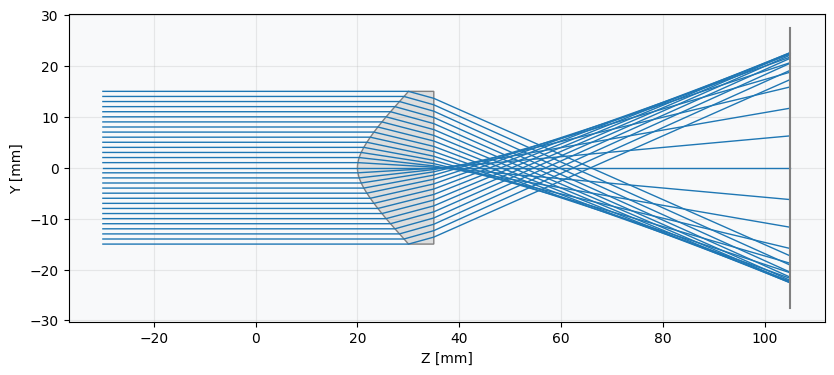

In [3]:
lens.draw(num_rays=31)

but we do not see any actual source rays yet. That's because we havent "attached" the extended source to the optical system!

Generated 8192 collimated rays for simulation using backend: 'numpy'
Successfully created backend-agnostic RealRays object with 8192 collimated rays.
Each ray carries equal power: 1.221e-04 Watts (importance-sampled).


(<Figure size 1800x800 with 8 Axes>,
 [<Axes: title={'center': 'CollimatedGaussianSource\nSpatial Distribution'}, xlabel='X [mm]', ylabel='Y [mm]'>,
  <Axes: title={'center': 'Spatial Cross-Sections'}, xlabel='x / y X [mm]', ylabel='Normalized Intensity'>,
  <Axes: title={'center': 'XZ Ray Propagation'}, xlabel='Z [mm]', ylabel='X [mm]'>,
  <Axes: title={'center': 'Angular Distribution'}, xlabel='L (Direction Cosine)', ylabel='M (Direction Cosine)'>,
  <Axes: title={'center': 'Angular Cross-Sections'}, xlabel='L / M L', ylabel='Normalized Intensity'>,
  <Axes: title={'center': 'YZ Ray Propagation'}, xlabel='Z [mm]', ylabel='Y [mm]'>])

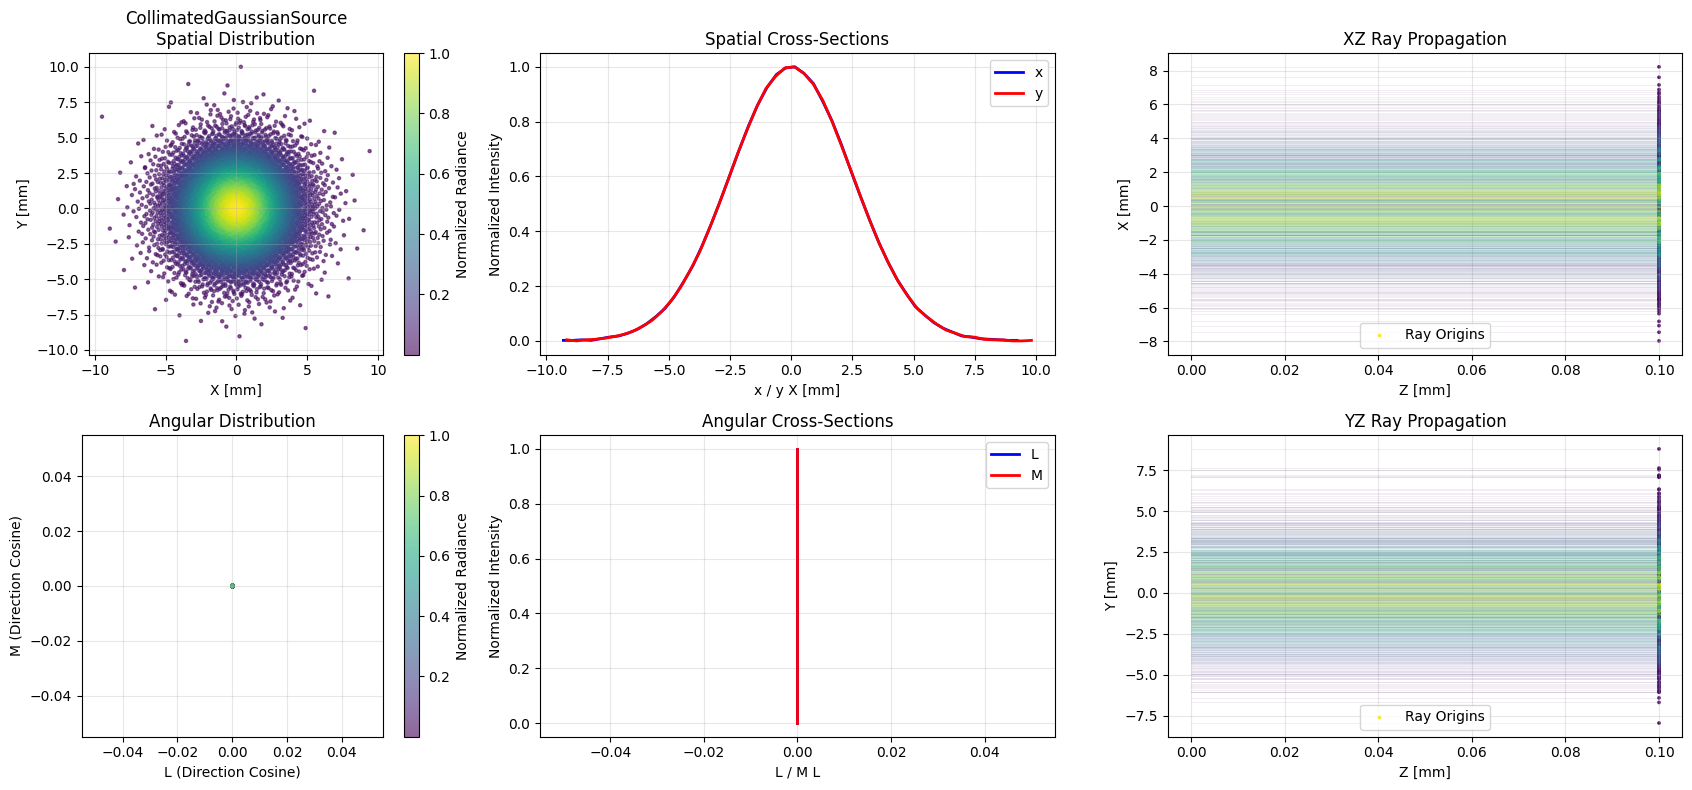

In [4]:
# first create the extended source
source = CollimatedGaussianSource(
    gaussian_waist=gaussian_beam_waist,
    wavelength=wavelength_µm,  # convert to µm
    total_power=1.0,
    position=(0, 0, 0),  # we can specifiy the position of the source here (x,y,z)!
)
# we can visualize the source rays
source.draw()

Generated 32 collimated rays for simulation using backend: 'numpy'
Successfully created backend-agnostic RealRays object with 32 collimated rays.
Each ray carries equal power: 3.125e-02 Watts (importance-sampled).


(<Figure size 1000x400 with 1 Axes>, <Axes: xlabel='Z [mm]', ylabel='Y [mm]'>)

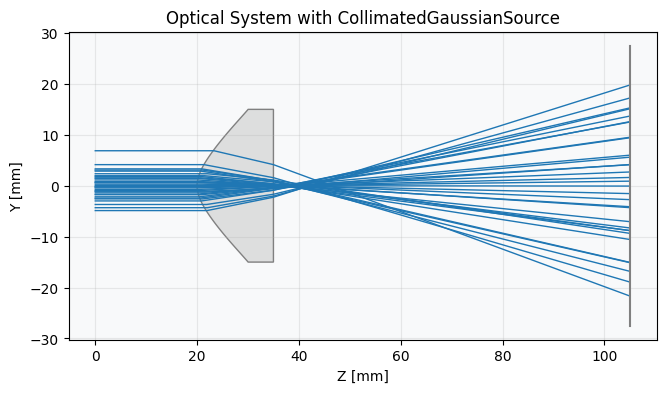

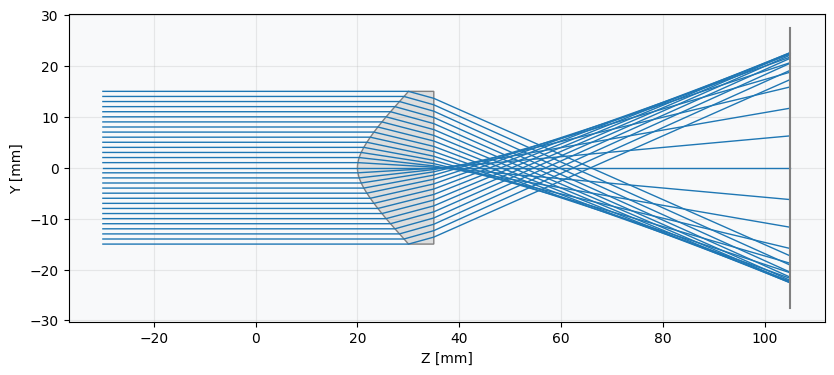

In [5]:
# finally, we can attach the source to the optical system
lens.set_source(source)
lens.draw(num_rays=31)
lens.source = None  # detach the source again
lens.draw(num_rays=31)  # no rays should be shown now

=== Testing Enhanced Analysis Integration ===

2. Enhanced approach (using extended source directly):
Generated 1048576 collimated rays for simulation using backend: 'numpy'
Successfully created backend-agnostic RealRays object with 1048576 collimated rays.
Each ray carries equal power: 9.537e-07 Watts (importance-sampled).
✅ Source-based irradiance analysis created successfully

3. Displaying irradiance map from extended source:

✅ Integration successful! Peak irradiance: 7.37e-04 W/mm²
✅ Source-based irradiance analysis created successfully

3. Displaying irradiance map from extended source:

✅ Integration successful! Peak irradiance: 7.37e-04 W/mm²


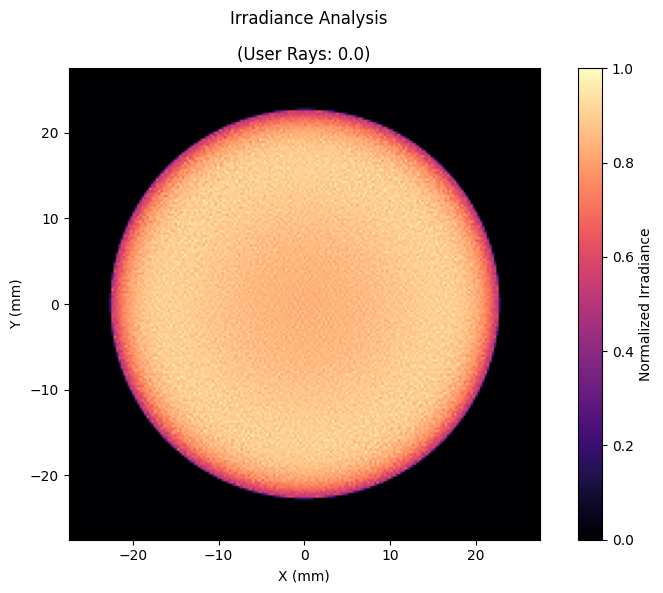

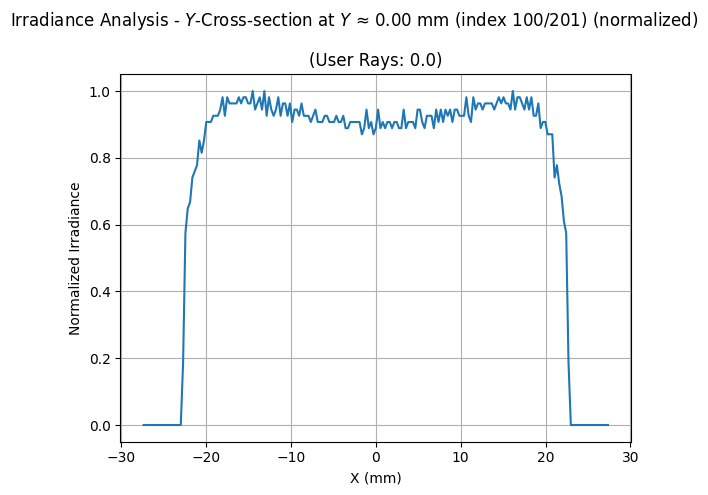

In [ ]:
# now we can analyze the final irradiance at the image plane
# using the extended source directly!
import matplotlib.pyplot as plt

# first create the extended source
source = CollimatedGaussianSource(
    gaussian_waist=gaussian_beam_waist,
    wavelength=wavelength_µm,  # convert to µm
    total_power=1.0,
    position=(0, 0, 0),  # we can specifiy the position of the source here (x,y,z)!
)
print("=== Testing Enhanced Analysis Integration ===")

# Now let's try the enhanced approach with direct source integration
print("\n2. Enhanced approach (using extended source directly):")
irradiance_source = IncoherentIrradiance(
    lens,
    detector_surface=-1,
    source=source,  # Pass the CollimatedGaussianSource directly!
    num_rays=1000000,  # More rays for better statistics
    res=(201, 201),
)
print("✅ Source-based irradiance analysis created successfully")

# Display the irradiance map
print("\n3. Displaying irradiance map from extended source:")
irradiance_source.view(figsize=(8, 6), cmap="magma")
irradiance_source.view(cross_section=("cross-y", 100))

print(
    f"\n✅ Integration successful! Peak irradiance: {irradiance_source.peak_irradiance()[0][0]:.2e} W/mm²"
)

=== Custom Ray Generation (Pre-Source Package) ===
Generating rays...
Generated 1048576 collimated Gaussian rays as Torch tensors.
Each ray carries 9.537e-07 Watts of power.
Creating irradiance analysis...

--- Displaying Final Irradiance Profile ---

✅ Custom ray generation successful!
Peak irradiance: 7.37e-04 W/mm²
Total rays traced: 1048576

--- Key Differences from Built-in Source ---
✅ Your custom class: 1048576 rays with PyTorch generation
✅ Uses Sobol sequences for better sampling
✅ Converts to NumPy for Optiland compatibility
⚠️  More complex than: IncoherentIrradiance(lens, source=source)
⚠️  Requires manual tensor-to-numpy conversion
💡 Consider using the new source integration for simpler workflows!

--- Displaying Final Irradiance Profile ---

✅ Custom ray generation successful!
Peak irradiance: 7.37e-04 W/mm²
Total rays traced: 1048576

--- Key Differences from Built-in Source ---
✅ Your custom class: 1048576 rays with PyTorch generation
✅ Uses Sobol sequences for better s

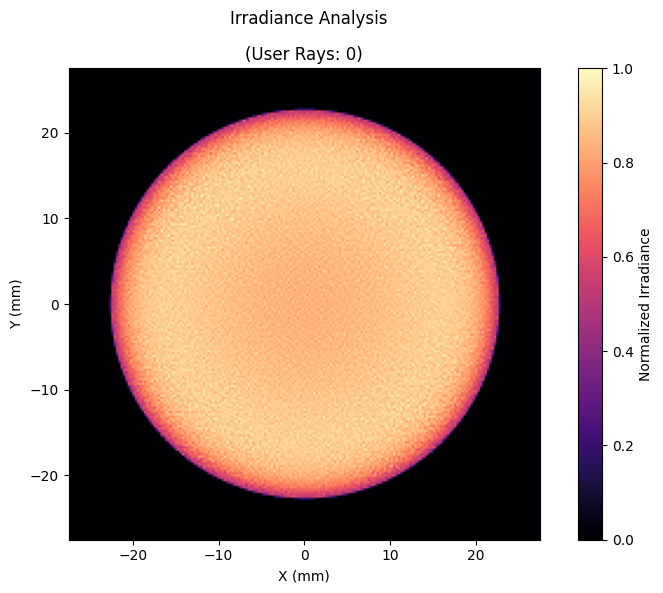

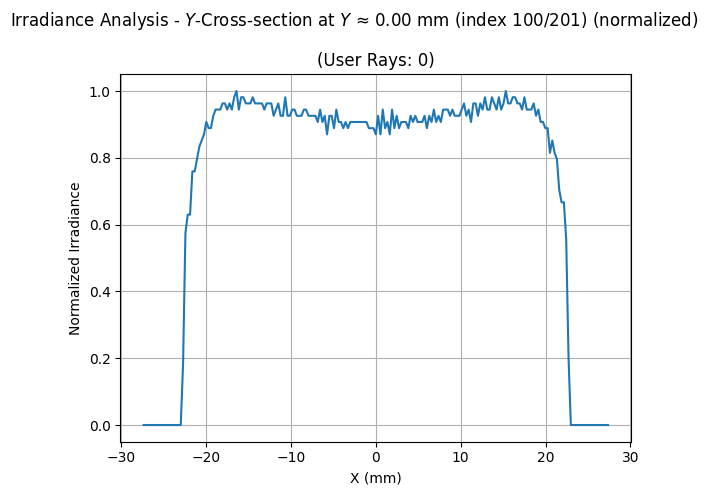

In [10]:
import optiland.backend as be
import numpy as np
import torch
from scipy.stats.qmc import Sobol
from optiland.rays import RealRays


class CollimatedGaussianSources:
    """
    Generates a high-quality, collimated Gaussian beam using Sobol sequences.
    Can output either PyTorch tensors or NumPy arrays depending on backend compatibility.
    """

    def __init__(self, gaussian_waist, wavelength, total_power=1.0, device="cpu"):
        self.wavelength = wavelength
        self.total_power = total_power
        self.sigma_spatial_mm = gaussian_waist / 2.0
        self.device = device

    def generate_rays(self, num_rays):
        """Generates the RealRays object, converting tensors to numpy for compatibility."""
        num_rays_pow2 = 1 << (num_rays - 1).bit_length()
        sampler = Sobol(d=2, scramble=True)
        u_numpy = sampler.random(n=num_rays_pow2)

        # Convert NumPy array from sampler to a PyTorch tensor
        u = torch.from_numpy(u_numpy).float()

        sqrt2 = torch.tensor(np.sqrt(2.0), dtype=torch.float32)

        # Generate Gaussian spatial distribution using inverse error function
        x_start = self.sigma_spatial_mm * sqrt2 * torch.erfinv(2 * u[:, 0] - 1)
        y_start = self.sigma_spatial_mm * sqrt2 * torch.erfinv(2 * u[:, 1] - 1)

        # Collimated beam: all rays start at z=0 and propagate along +z
        z_start = torch.zeros(num_rays_pow2)
        L_initial = torch.zeros(num_rays_pow2)  # No x-direction component
        M_initial = torch.zeros(num_rays_pow2)  # No y-direction component
        N_initial = torch.ones(num_rays_pow2)  # All rays go in +z direction

        # Power per ray
        power_per_ray = self.total_power / num_rays_pow2
        intensity_array = torch.full((num_rays_pow2,), power_per_ray)
        wavelength_array = torch.full((num_rays_pow2,), self.wavelength)

        print(f"Generated {num_rays_pow2} collimated Gaussian rays as Torch tensors.")
        print(f"Each ray carries {power_per_ray:.3e} Watts of power.")

        # FIXED: Convert PyTorch tensors to NumPy arrays for Optiland compatibility
        return RealRays(
            x=x_start.detach().cpu().numpy(),
            y=y_start.detach().cpu().numpy(),
            z=z_start.detach().cpu().numpy(),
            L=L_initial.detach().cpu().numpy(),
            M=M_initial.detach().cpu().numpy(),
            N=N_initial.detach().cpu().numpy(),
            intensity=intensity_array.detach().cpu().numpy(),
            wavelength=wavelength_array.detach().cpu().numpy(),
        )


print("=== Custom Ray Generation (Pre-Source Package) ===")

# Create the custom ray generator
analysis_source = CollimatedGaussianSources(
    gaussian_waist=gaussian_beam_waist,  # Use the same waist as the CollimatedGaussianSource
    wavelength=wavelength_µm,  # Convert to µm
    total_power=1.0,
)

# Generate rays
print("Generating rays...")
analysis_rays = analysis_source.generate_rays(
    num_rays=1000000
)  # Reasonable number for demo

# Create irradiance analysis using the custom rays
print("Creating irradiance analysis...")
final_irradiance = IncoherentIrradiance(
    lens,
    detector_surface=-1,
    user_initial_rays=analysis_rays,
    res=(201, 201),  # Reasonable resolution
)

print("\n--- Displaying Final Irradiance Profile ---")
# Use correct API - view() only accepts figsize and cmap
final_irradiance.view(figsize=(8, 6), cmap="magma")
final_irradiance.view(cross_section=("cross-y", 100))
print(f"\n✅ Custom ray generation successful!")
print(f"Peak irradiance: {final_irradiance.peak_irradiance()[0][0]:.2e} W/mm²")
print(f"Total rays traced: {len(analysis_rays.x)}")

# Show comparison with the built-in CollimatedGaussianSource
print(f"\n--- Key Differences from Built-in Source ---")
print(f"✅ Your custom class: {len(analysis_rays.x)} rays with PyTorch generation")
print(f"✅ Uses Sobol sequences for better sampling")
print(f"✅ Converts to NumPy for Optiland compatibility")
print(f"⚠️  More complex than: IncoherentIrradiance(lens, source=source)")
print(f"⚠️  Requires manual tensor-to-numpy conversion")
print(f"💡 Consider using the new source integration for simpler workflows!")

Generated 8192 valid rays for simulation using backend: 'numpy'
Successfully created backend-agnostic RealRays object with 8192 rays.
Each ray carries 1.221e-04 Watts of power.


(<Figure size 1800x800 with 8 Axes>,
 [<Axes: title={'center': 'GaussianSource\nSpatial Distribution'}, xlabel='X [mm]', ylabel='Y [mm]'>,
  <Axes: title={'center': 'Spatial Cross-Sections'}, xlabel='x / y X [mm]', ylabel='Normalized Intensity'>,
  <Axes: title={'center': 'XZ Ray Propagation'}, xlabel='Z [mm]', ylabel='X [mm]'>,
  <Axes: title={'center': 'Angular Distribution'}, xlabel='L (Direction Cosine)', ylabel='M (Direction Cosine)'>,
  <Axes: title={'center': 'Angular Cross-Sections'}, xlabel='L / M L', ylabel='Normalized Intensity'>,
  <Axes: title={'center': 'YZ Ray Propagation'}, xlabel='Z [mm]', ylabel='Y [mm]'>])

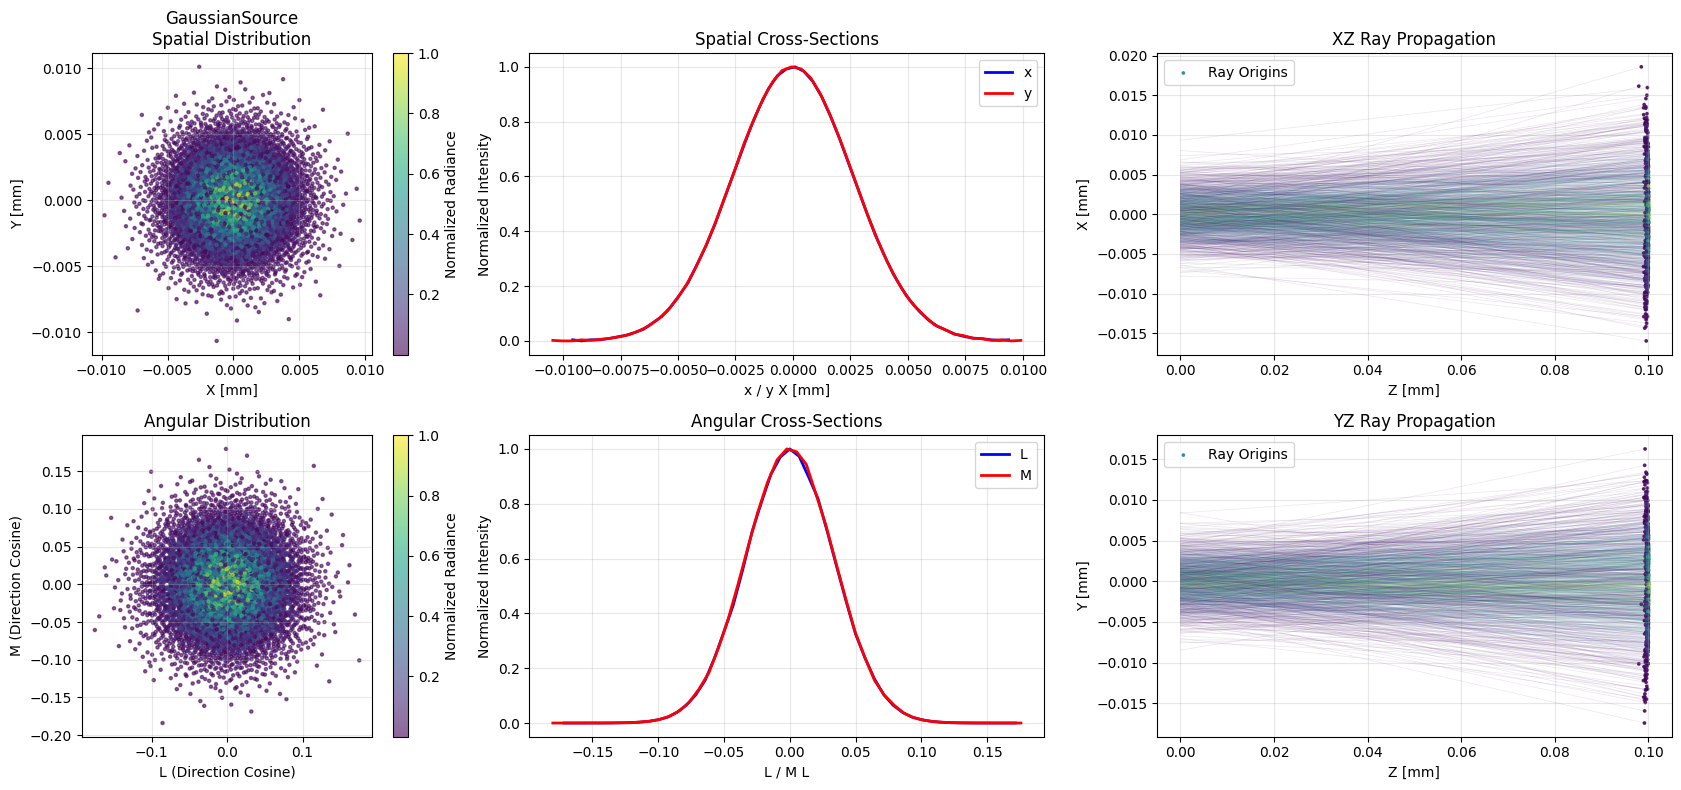

In [14]:
# first create the extended source
source_fiber = GaussianSource(
    mfd=10.4,  # convert to µm
    total_power=1.0,
    position=(0, 0, 0),  # we can specifiy the position of the source here (x,y,z)!
)
# we can visualize the source rays
source_fiber.draw(num_rays=6000)